# Data Loading and Initial Exploration
This section loads the CNN articles dataset, checks for missing values, summarizes the data types, and shows the distribution of article categories.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('CNN_Articels_clean.csv')

# Check the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Get a summary of the data types and non-null counts
print("\nData Summary:")
print(df.info())

# Check the distribution of categories
print("\nDistribution of categories:")
print(df['Category'].value_counts())

First few rows of the dataset:
   Index                                             Author  \
0      0                                 Jacopo Prisco, CNN   
1      1                              Stephanie Bailey, CNN   
2      2  Words by Stephanie Bailey, video by Zahra Jamshed   
3      3                                     Kathryn Vasel    
4      4                    Paul R. La Monica, CNN Business   

        Date published  Category    Section  \
0  2021-07-15 02:46:59      news      world   
1  2021-05-12 07:52:09      news      world   
2  2021-06-16 02:51:30      news       asia   
3  2022-03-18 14:37:21  business    success   
4  2022-03-19 11:41:08  business  investing   

                                                 Url  \
0  https://www.cnn.com/2021/07/14/world/tusimple-...   
1  https://www.cnn.com/2021/05/12/world/ironhand-...   
2  https://www.cnn.com/2021/06/15/asia/swarm-robo...   
3  https://www.cnn.com/2022/03/18/success/pandemi...   
4  https://www.cnn.com/2022

# Data Cleaning by Removing Missing Article Text
Below section removes rows with missing values in the "Article text" column and then verifies that the column no longer contains any missing values.

In [4]:
# Drop rows with missing 'Article text'
df_cleaned = df.dropna(subset=['Article text'])

# Verify there are no more missing values in the 'Article text' column
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())


Missing values after cleaning:
Index              0
Author             0
Date published     0
Category           0
Section            0
Url                0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       0
dtype: int64


# Removing '(CNN)' from Article Text
code defines a function to remove the phrase "(CNN)" from the "Article text" column, including variations like "(cnn)". The function is applied to clean the text, and the first few rows of the cleaned data are displayed to confirm the removal.

In [5]:
import re

# Function to remove the phrase '(CNN)' from the article text
def remove_cnn_phrase(text):
    # Remove variations of (CNN), (cnn), or extra spaces
    return re.sub(r'\(cnn\)|\(CNN\)', '', text).strip()

# Apply the function to the 'Article text' column
df_cleaned['Article text'] = df_cleaned['Article text'].apply(remove_cnn_phrase)

# Check if '(CNN)' was successfully removed
print(df_cleaned['Article text'].head())


0    Right now, there's a shortage of truck drivers...
1    Working in a factory or warehouse can mean doi...
2    In a Hong Kong warehouse, a swarm of autonomou...
3    The pandemic thrust the working world into a n...
4    New York (CNN Business)March Madness isn't jus...
Name: Article text, dtype: object


<ipython-input-5-d6b8de0340dc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Article text'] = df_cleaned['Article text'].apply(remove_cnn_phrase)


# Converting and Cleaning 'Date Published' Column
Following converts the 'Date published' column to datetime format, identifies any invalid dates, and drops rows with unconvertible dates. Finally, the shape of the cleaned dataset is checked to confirm the number of remaining rows.

In [6]:
# Convert 'Date published' to datetime format
df_cleaned['Date published'] = pd.to_datetime(df_cleaned['Date published'], errors='coerce')

# Check for any invalid dates that couldn't be converted
print("\nInvalid dates after conversion:")
print(df_cleaned[df_cleaned['Date published'].isnull()])

# Drop rows with invalid dates, if necessary
df_cleaned = df_cleaned.dropna(subset=['Date published'])

# Check final shape of the cleaned dataset
print("\nFinal dataset shape after cleaning:")
print(df_cleaned.shape)


Invalid dates after conversion:
Empty DataFrame
Columns: [Index, Author, Date published, Category, Section, Url, Headline, Description, Keywords, Second headline, Article text]
Index: []

Final dataset shape after cleaning:
(37940, 11)


<ipython-input-6-c97cd517248b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date published'] = pd.to_datetime(df_cleaned['Date published'], errors='coerce')


# Preprocessing Article Text
Below code performs text preprocessing on the 'Article text' column by converting the text to lowercase, removing punctuation and special characters, tokenizing the text, and filtering out stop words. The cleaned text is stored in a new column, 'cleaned_text', and the first few rows are displayed to verify the changes.

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Define stop words
stop_words = set(stopwords.words('english'))

# Function for text preprocessing
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Join the words back into a single string
    return ' '.join(words)

# Apply preprocessing to the 'Article text' column
df_cleaned['cleaned_text'] = df_cleaned['Article text'].apply(preprocess_text)

# Check the first few rows of the cleaned text
print(df_cleaned[['Article text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                        Article text  \
0  Right now, there's a shortage of truck drivers...   
1  Working in a factory or warehouse can mean doi...   
2  In a Hong Kong warehouse, a swarm of autonomou...   
3  The pandemic thrust the working world into a n...   
4  New York (CNN Business)March Madness isn't jus...   

                                        cleaned_text  
0  right theres shortage truck drivers us worldwi...  
1  working factory warehouse mean task repetition...  
2  hong kong warehouse swarm autonomous robots wo...  
3  pandemic thrust working world new reality marc...  
4  new york cnn businessmarch madness isnt colleg...  


# Text Tokenization and Sequence Preparation
Following initializes a tokenizer to convert the cleaned article text into sequences of integers, using the top 20,000 most frequent words and padding sequences to a maximum length of 100. Additionally, it encodes the article categories into integer labels for classification. Finally, the shapes of the processed feature and label datasets are printed for verification.

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the maximum number of words to use (top 20,000 most frequent words)
max_words = 20000
# Define the maximum length of a sequence (for padding)
max_len = 100

# Initialize the tokenizer and fit on the cleaned text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_cleaned['cleaned_text'])

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(df_cleaned['cleaned_text'])

# Apply padding to ensure all sequences have the same length
X = pad_sequences(sequences, maxlen=max_len)

# Convert categories to integer labels (for classification)
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_cleaned['Category'])

# Print shapes of the final processed data
print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)


Shape of X (features): (37940, 100)
Shape of y (labels): (37940,)


# GRU Model Definition and Training
Below code defines and trains a Gated Recurrent Unit (GRU) model for text classification. The model includes an embedding layer, a GRU layer with L2 regularization and dropout for regularization, and a dense output layer. It incorporates callbacks for learning rate reduction and early stopping based on validation loss to enhance training efficiency. The model is compiled with the Adam optimizer and trained on the preprocessed dataset for 20 epochs.

In [15]:
from tensorflow.keras.layers import GRU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define the GRU model with higher L2 regularization and learning rate scheduling
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=max_words, output_dim=128))

# GRU layer with L2 regularization and dropout
model.add(GRU(128, activation='tanh', kernel_regularizer=l2(0.05)))
model.add(Dropout(0.5))

# Output layer with L2 regularization
model.add(Dense(9, activation='softmax', kernel_regularizer=l2(0.05)))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with learning rate scheduling and early stopping
history_gru_trained = model.fit(X, y, epochs=20, batch_size=64, validation_split=0.2, callbacks=[reduce_lr, early_stopping])


Epoch 1/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.4931 - loss: 3.7805 - val_accuracy: 0.7889 - val_loss: 0.7497 - learning_rate: 0.0010
Epoch 2/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7186 - loss: 1.0332 - val_accuracy: 0.9599 - val_loss: 0.3458 - learning_rate: 0.0010
Epoch 3/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8335 - loss: 0.6870 - val_accuracy: 0.9651 - val_loss: 0.2906 - learning_rate: 0.0010
Epoch 4/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8431 - loss: 0.6327 - val_accuracy: 0.9649 - val_loss: 0.3447 - learning_rate: 0.0010
Epoch 5/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8444 - loss: 0.5741 - val_accuracy: 0.9294 - val_loss: 0.3777 - learning_rate: 0.0010
Epoch 6/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8717 - loss: 0.4950 - val_accuracy: 0.9291 - val_loss: 0.3413 - learning_rate: 0.0010
Epoch 7/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8970 - loss: 0.415

# Loss and Accuracy Visualization
Below section visualizes the training and validation loss and accuracy over the epochs. It creates two subplots: one for loss and another for accuracy, allowing for a clear comparison between training and validation metrics. The plots help assess the model's performance and identify potential overfitting or underfitting during training.


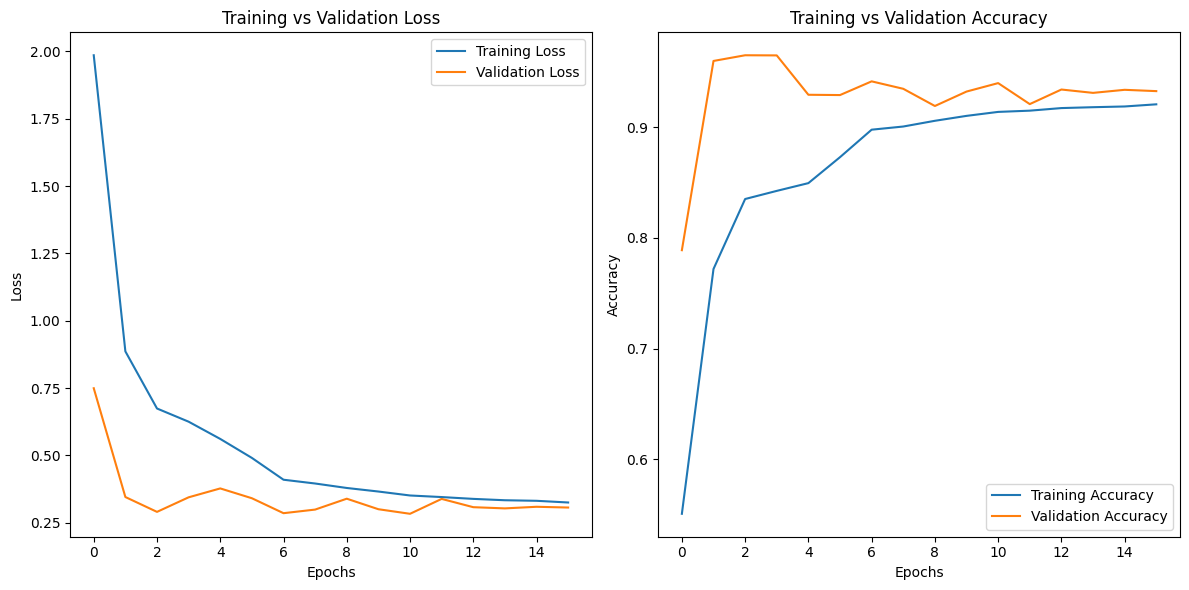

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_gru_trained.history['loss'], label='Training Loss')
plt.plot(history_gru_trained.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_gru_trained.history['accuracy'], label='Training Accuracy')
plt.plot(history_gru_trained.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()